In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.12.0


## Q3. a) Tensorflow/Keras tutorial

Import fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 2s 1us/step


Explore the features

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

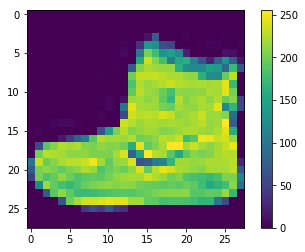

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)


rescale images before running through deep net

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0


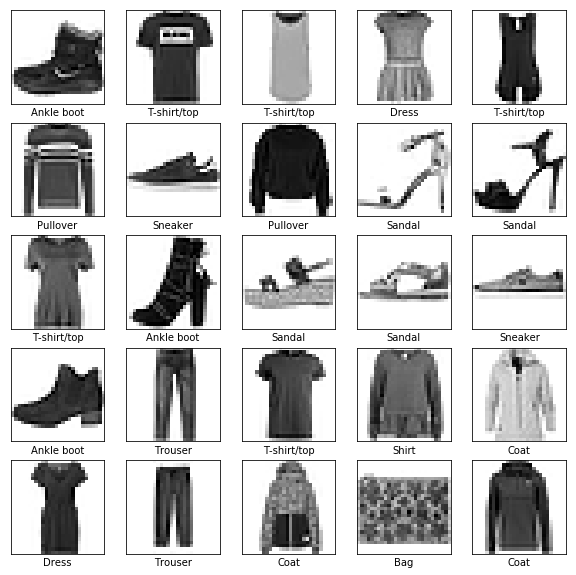

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


make deep net with three layers:

1) flatten image
2) fully connected layer with relu activation
3) fully connected layer with softmax activation (probabilities)

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train NN

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.5032 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3778 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3395 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3126 - acc: 0.8837
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.2948 - acc: 0.8903


Test loss and accuracy (check for overfitting)

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 30us/step
Test accuracy: 0.8752


running predictions

In [19]:
predictions = model.predict(test_images)


In [20]:
predictions[0]

array([7.8977209e-06, 2.1013300e-05, 9.7989357e-07, 1.2041208e-05,
       1.6139153e-05, 7.4518453e-03, 9.0912608e-06, 5.5391472e-02,
       1.1348465e-04, 9.3697608e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]


9

Look at full set of 10 channels

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


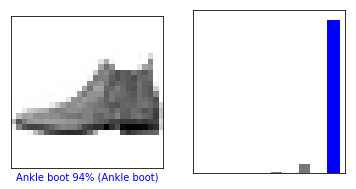

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


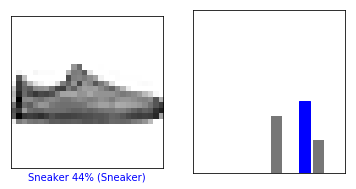

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


plot several images with their predictions

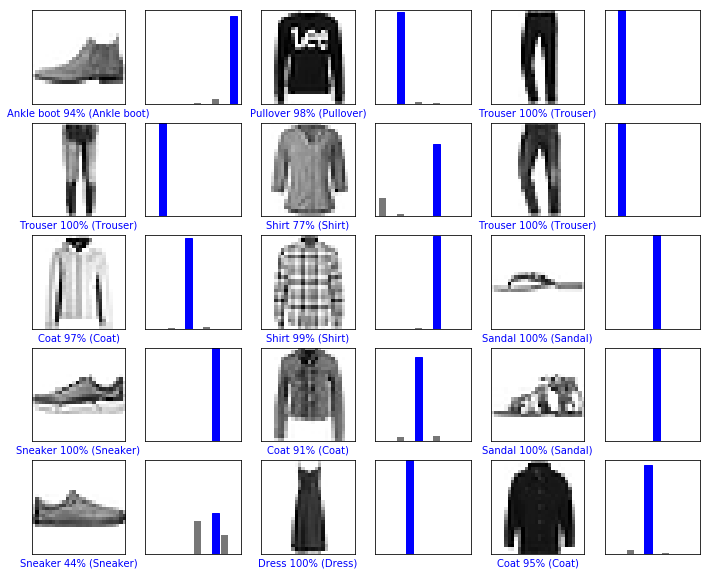

In [27]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


Use trained model to make prediction on single image

In [28]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)


(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


make prediction

In [30]:
predictions_single = model.predict(img)

print(predictions_single)


[[7.8977364e-06 2.1013320e-05 9.7989459e-07 1.2041196e-05 1.6139122e-05
  7.4518523e-03 9.0912445e-06 5.5391464e-02 1.1348465e-04 9.3697608e-01]]


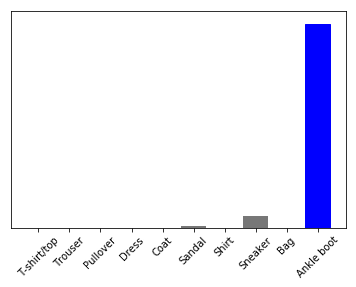

In [31]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [32]:
np.argmax(predictions_single[0])

9

In [33]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.


## Q3 b) Image Transformation and prediction

#### Image Augmentation

In [91]:
# select 5 images and transform them
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest')

In [92]:
def transformer(img, train_datagen):
    tmp = img
    tmp = (np.expand_dims(tmp,3))
    tmp = (np.expand_dims(tmp,3))
    train_datagen.fit(tmp)
    return (train_datagen.random_transform(np.expand_dims(img,0), seed=None)).reshape(28,28)

In [94]:
transformed = []

for i in range(5):
    transformed.append(transformer(test_images[i], train_datagen))

/home/daniel/Documents/Fall_2018/DSL/DataScienceLab/.env/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


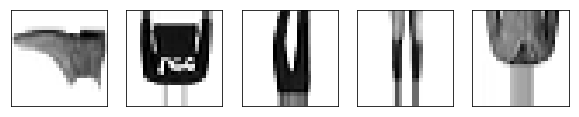

In [95]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(transformed[i], cmap=plt.cm.binary)

#### prediction on augmented images

In [99]:
test_images.shape

(10000, 28, 28)

In [103]:
transformed = np.array(transformed)
transformed.shape

(5, 28, 28)

In [104]:
aug_preds = model.predict(transformed)

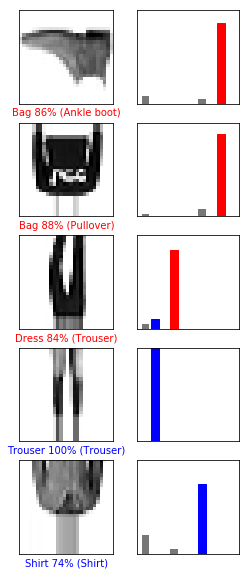

In [109]:
# Plot the 5 images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, aug_preds, test_labels, transformed)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, aug_preds, test_labels)

In [118]:
t_labels = [test_labels[i] for i in range(5)]
t_labels = np.array(t_labels)
t_labels.shape

(5,)

#### Observations

In [119]:
test_loss, test_acc = model.evaluate(transformed, t_labels)

print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 498us/step
Test accuracy: 0.4000000059604645


For this test, I modified images from the test set because these simulate images that our model has never seen before. If we wanted to improve our classifier, we would perform image augmentation (random transforms) on the training set, so that it will improve its performance on test images.


## Q3. c) ImageNet

These are the images I have in my directory that I will run through the Inception classifier.

In [137]:
%%bash

cd ~/models/tutorials/image/imagenet
pwd
ls

/home/daniel/models/tutorials/image/imagenet
BUILD
classify_image.py
deadpool.jpeg
mouwser.jpeg
much_wow.jpeg


In [153]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

### Deadpool Classification

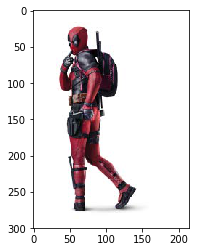

In [155]:
deadpool = Image.open('/home/daniel/models/tutorials/image/imagenet/deadpool.jpg', 'r')
imshow(np.asarray(deadpool))

In [156]:
%%bash

cd ~/models/tutorials/image/imagenet
python classify_image.py --image_file='deadpool.jpg'

cuirass (score = 0.18074)
breastplate, aegis, egis (score = 0.14944)
parachute, chute (score = 0.09794)
knee pad (score = 0.07775)
ski (score = 0.03096)


Instructions for updating:
Use tf.gfile.GFile.
2018-11-25 22:26:28.422003: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2018-11-25 22:26:28.562353: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Looks like this classifier has no idea that this is deadpool.

### Cat Classification

In [ ]:
mouwsers = Image.open('/home/daniel/models/tutorials/image/imagenet/mouwser.jpg', 'r')
plt.subplot(312)
imshow(np.asarray(mouwsers))

In [158]:
%%bash

cd ~/models/tutorials/image/imagenet
python classify_image.py --image_file='mouwser.jpg'

Egyptian cat (score = 0.06883)
washbasin, handbasin, washbowl, lavabo, wash-hand basin (score = 0.05592)
Angora, Angora rabbit (score = 0.03440)
soap dispenser (score = 0.02485)
bath towel (score = 0.02154)


Instructions for updating:
Use tf.gfile.GFile.
2018-11-25 22:27:39.316990: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2018-11-25 22:27:39.447066: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Highest score that the classifier gave is "Egyptian cat." Personally, I do not know if this cat is Egyptian, but it definitiely is a cat.

### Dog Classification

In [ ]:
much_wow = Image.open('/home/daniel/models/tutorials/image/imagenet/much_wow.jpg','r')
plt.subplot(313)
imshow(np.asarray(much_wow))

In [159]:
%%bash

cd ~/models/tutorials/image/imagenet
python classify_image.py --image_file='much_wow.jpg'

Pembroke, Pembroke Welsh corgi (score = 0.10619)
screen, CRT screen (score = 0.09168)
television, television system (score = 0.04612)
Norwegian elkhound, elkhound (score = 0.03515)
dingo, warrigal, warragal, Canis dingo (score = 0.02655)


Instructions for updating:
Use tf.gfile.GFile.
2018-11-25 22:29:57.109948: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2018-11-25 22:29:57.240810: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Looks like the classifier's top guess is that this is a corgi. Indeed, the image is that of a dog. However, the classifier is almost as sure that the image is a dog, as it is sure that it is a TV.